In [6]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import import_ipynb

ImportError: DLL load failed while importing _network: The specified module could not be found.

In [ ]:
#As always we have to specify to jupyter that we want to see all the outputs.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 20


In [ ]:
%%capture
#the %%capture makes sure not the whole of last assignment is printed here

#This imports dataframes from other code.
from Demographicframes import deaths_per_district


In [ ]:
deaths_per_district

In [33]:
india_shp_MASTERS = './maps-master/maps-master/Districts/Census_2011/2011_Dist.shp'

In [34]:
india_s_masters = gpd.read_file(india_shp_MASTERS)
india_s_masters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DISTRICT    641 non-null    object  
 1   ST_NM       641 non-null    object  
 2   ST_CEN_CD   641 non-null    int64   
 3   DT_CEN_CD   641 non-null    int64   
 4   censuscode  641 non-null    int64   
 5   geometry    641 non-null    geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 30.2+ KB


In [35]:
india_s_masters.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


<AxesSubplot:>

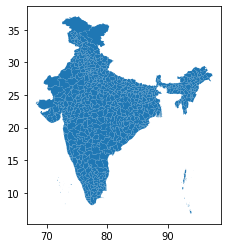

In [36]:
india_s_masters.plot()

In [37]:
##for joining two files
##india_joined = india_s_masters.join(, on='censuscode')
##india_joined.head()

In [38]:
df = pd.DataFrame(np.random.randint(0,100,size=(641, 1)))

In [39]:
india_s_masters['random'] = df

In [40]:
india_s_masters.head()


,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,random
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",62
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",78
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",98
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",82
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",14


In [41]:
# We drop the row with the data that is unclear
india_s_masters = india_s_masters[india_s_masters['censuscode'] != 0]

In [42]:
columns_to_plot = ['random']

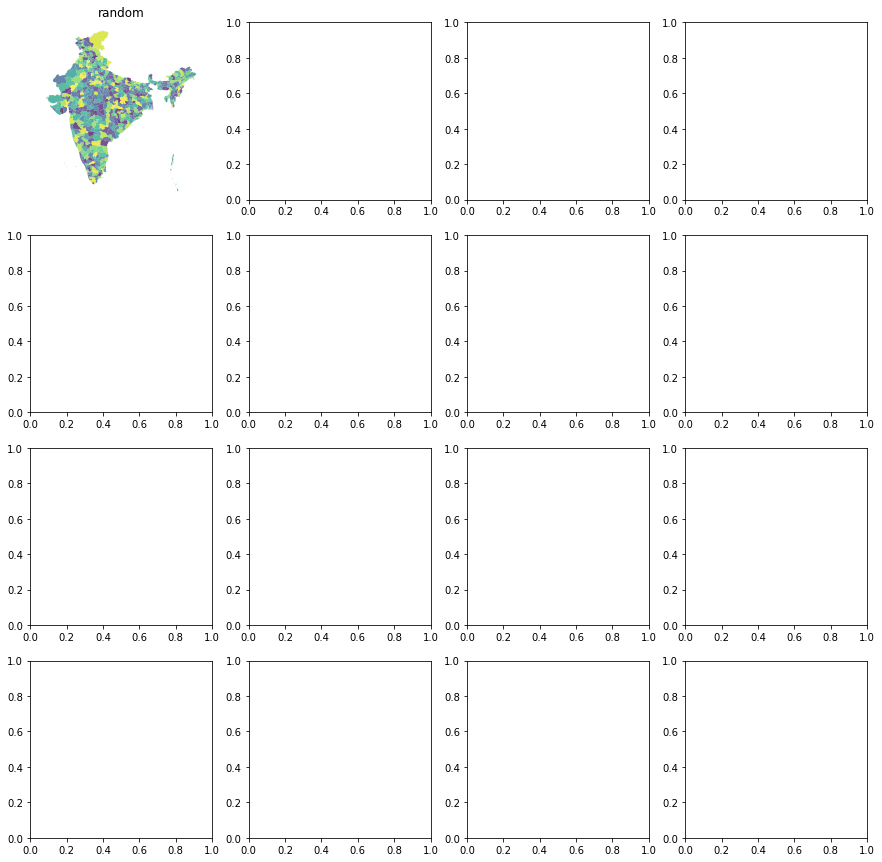

In [43]:
f, axs = plt.subplots(4,4, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axs[i]
    india_s_masters.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 0.75)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [44]:
india_s_masters.sort_values(by='censuscode', ascending=False)


,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,random
638,South Andaman,Andaman & Nicobar Island,35,3,640,"MULTIPOLYGON (((92.69758 12.23961, 92.69778 12...",51
639,North & Middle Andaman,Andaman & Nicobar Island,35,2,639,"MULTIPOLYGON (((92.89905 12.91512, 92.89905 12...",44
637,Nicobar,Andaman & Nicobar Island,35,1,638,"MULTIPOLYGON (((93.84861 7.24051, 93.84870 7.2...",50
633,Karaikal,Puducherry,34,4,637,"POLYGON ((79.76528 10.99681, 79.76963 10.99519...",23
353,Mahe,Puducherry,34,3,636,"MULTIPOLYGON (((75.54502 11.73396, 75.55523 11...",2
...,...,...,...,...,...,...,...
450,Punch,Jammu & Kashmir,1,5,5,"POLYGON ((74.32009 33.95562, 74.32773 33.94523...",6
283,Kargil,Jammu & Kashmir,1,4,4,"POLYGON ((76.66040 34.38012, 76.67459 34.32414...",14
338,Leh (ladakh),Jammu & Kashmir,1,3,3,"POLYGON ((79.38467 35.99429, 79.38682 35.99047...",92
31,Badgam,Jammu & Kashmir,1,2,2,"POLYGON ((74.82323 34.04905, 74.82835 34.04648...",39
